# Linear Regression

In [19]:
# import The necessery libraries and the csv file we are going to use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import category_encoders as ce


student_df = pd.read_csv('./data/student-mat.csv',delimiter=';')

In [2]:
# Show us what the data looks like
print(student_df.shape)
print(student_df.describe())

(395, 33)
              age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.554430   
std      0.896659

In [13]:
# Show all the distinct values of the final score
student_df['G3'].value_counts()

10    56
11    47
0     38
15    33
8     32
13    31
12    31
9     28
14    27
16    16
6     15
18    12
7      9
5      7
17     6
19     5
20     1
4      1
Name: G3, dtype: int64

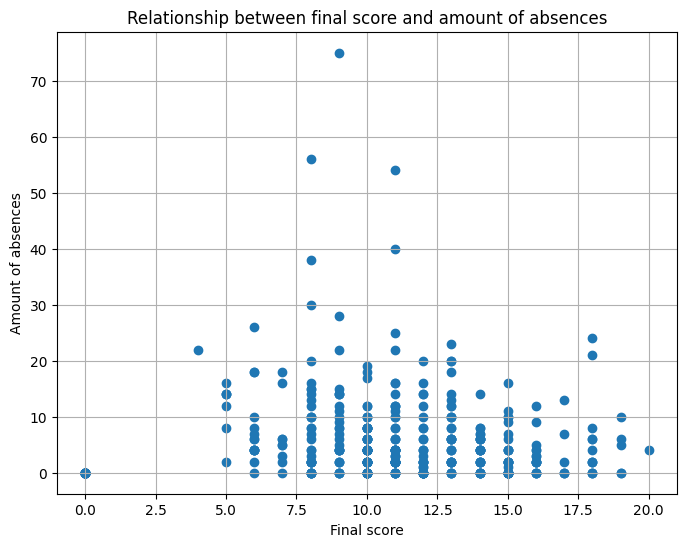

In [20]:
# Plot a figure of the relation between the final score and the amount of absences
plt.figure(figsize=(8, 6))
plt.scatter(student_df['G3'], student_df['absences'], alpha=1.0)  
plt.title('Relationship between final score and amount of absences')  
plt.xlabel('Final score')  
plt.ylabel('Amount of absences')  
plt.grid(True)  
plt.show()

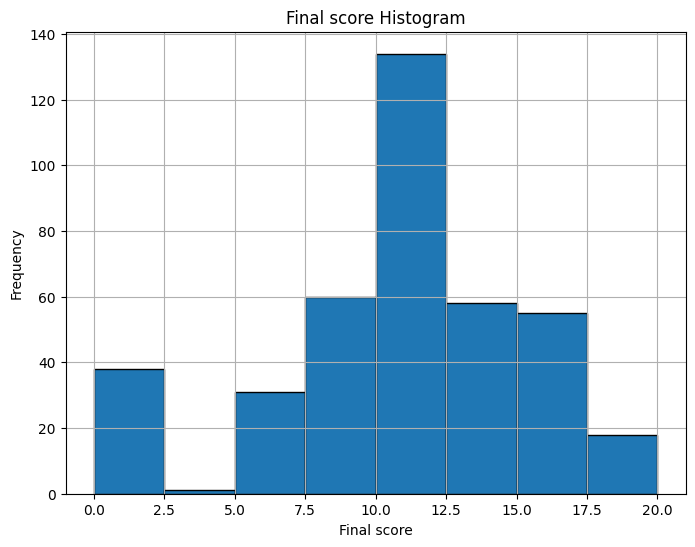

In [21]:
# Show the frequentie of all the different values fo the final scores
plt.figure(figsize=(8, 6))
plt.hist(student_df['G3'], bins=8, edgecolor='k')  
plt.title('Final score Histogram')  
plt.xlabel('Final score')  
plt.ylabel('Frequency') 
plt.grid(True) 

plt.show()

In [63]:
# select wich variables we are going to use
independent_vars = ['school', 'sex', 'age', 'address', 'studytime', 'absences', 'G1', 'G2']

# Use the Ordinal encoder to turn the school, sex and address variables wich are now strings into numbers
encoder = ce.OrdinalEncoder(cols=['school', 'sex', 'address'])
df_encoded = encoder.fit_transform(student_df)

# Use the transformed dataframe where school, sex and address are not strings anymore to give X (independent_vars) the variables we want to use to predict Y(G3)
X = df_encoded[independent_vars]  
y = df_encoded['G3']

# Split the dataset into 80% training set and 20% test set with the random state 0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [65]:
# Print the data in the X training set and the Y trainingset
print('independent:',X_train)
print('Dependent:',y_train)

independent:      school  sex  age  address  studytime  absences  G1  G2
64        1    1   15        1          2         0  10  10
55        1    1   16        1          2         8   8   9
343       1    1   17        1          2         0   9   8
219       1    1   17        1          3         4   9  10
366       2    2   18        1          3         0  13  13
..      ...  ...  ...      ...        ...       ...  ..  ..
323       1    1   17        1          3         1  12  14
192       1    2   17        1          2        12   7   8
117       1    2   16        1          1         0  13  14
47        1    2   16        1          4         4  19  19
172       1    2   17        1          2         0  13  11

[316 rows x 8 columns]
independent:     school sex  age address  studytime  absences  G1  G2
64      GP   F   15       U          2         0  10  10
55      GP   F   16       U          2         8   8   9
343     GP   F   17       U          2         0   9   8
21

In [66]:
# We use linear regression from the library we installed earlier and fit our model using the X and Y from the training set we created above
model = LinearRegression()
model.fit(X_train, y_train) 

# Then we print the intercept and coefficient af our data
print('Intercept', model.intercept_) 
print('Coefficient', model.coef_) 

Intercept 2.4932231592204737
Coefficient [ 0.61055595  0.20756336 -0.30691935 -0.08696631  0.05339717  0.05853222
  0.11524352  0.98535703]


In [67]:
# Here we reshape the array of coefficients so that we can print it together with the titel they belong to
coefficients = model.coef_.reshape(8,-1)
variables = np.array([['school', 'sex', 'age', 'address', 'studytime', 'absences', 'G1', 'G2']]).reshape(8,-1)

coeff = pd.DataFrame(coefficients, variables)

print(coeff)

                     0
(school,)     0.610556
(sex,)        0.207563
(age,)       -0.306919
(address,)   -0.086966
(studytime,)  0.053397
(absences,)   0.058532
(G1,)         0.115244
(G2,)         0.985357


In [68]:
# Then we try to predict the Y (Final score) values by useng the values of the X testset
y_pred = model.predict(X_test).round().astype(int)

In [69]:
# Now we print the actual values of the Y test set and the predicted values so we can compare them
result_df = pd.DataFrame({'Actual': y_test[:25], 'Predicted': y_pred[:25]})

print(result_df)

     Actual  Predicted
329      14         14
318      10         10
317       9          9
65       15         15
59       16         16
287      12         12
212      14         13
60       11         11
394       9          8
324      15         15
375      10          7
74       11         15
76       10         12
106       8          8
215      15         15
12       14         14
132      12         13
264       0          9
268      10          9
167      16         15
168       0          6
150       0          4
90        8          6
171      16         15
282      12         11


C:\Users\kiera\AppData\Local\Temp\ipykernel_1928\1425366346.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  result_df = pd.DataFrame({'Actual': y_test[:25], 'Predicted': y_pred[:25]})


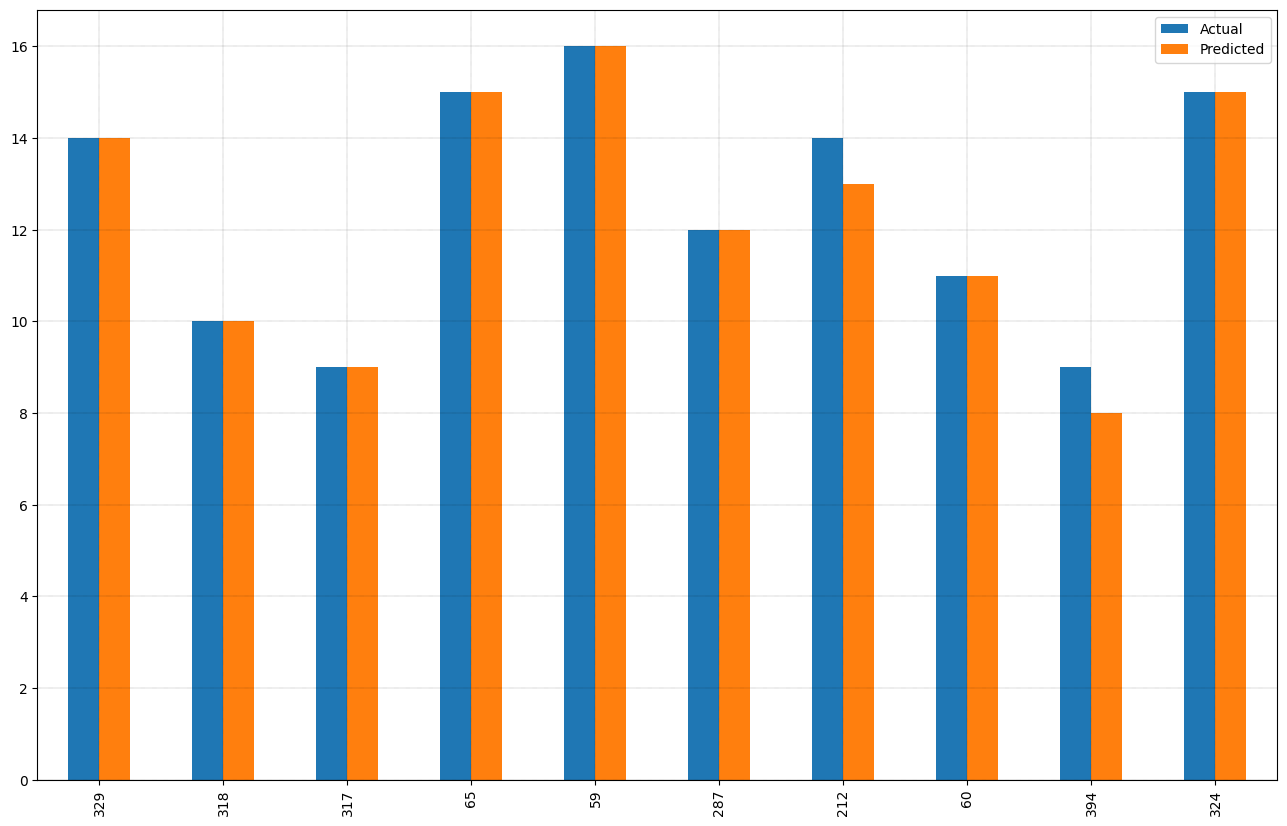

In [70]:
# Here I make a bar chart to compare the first 10 values of the actual Y and the predicted Y values
result10_df = result_df.head(10)
result10_df.plot(kind='bar', figsize=(16,10))
plt.grid(linestyle=':', linewidth='0.25', color='black')
plt.show()

In [71]:
# Here we calculate the R² score. This is how 'good' our model is (the closer to 1 the better the prediction)
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_pred)

print("R² Value:", r_squared)

R² Value: 0.7912383408254058


In [83]:
# Here we can give in the features of a student and our model will try to predict what this students final score will be
# First we make all the input fields for all of our values
new_student_features = {}
school = input('What school are you attending (For Gabriel Pereira insert GP, for Mousinho da Silveira insert MS): ').upper().strip()
sex = input('What sex are you (For female insert F, for male insert M): ').upper().strip()
age = input('How old are you: ')
address = input('Do you live in an urban (insert U) or a rural (insert R) neighboorhood: ').upper().strip()
studytime = input('How long do you study: ')
studytime = int(studytime)
absences = input('How manny times were you absent: ')
G1 = input('What was your first score: ')
G2 = input('What was your second score: ')

# Because I made it so you have to give a string for the school, sex and address I have an if that sets this to the numbers given to the corresponding values
# We also add all of these features to the new_student_features so we can use this to make our prediction
if school == 'GP':
    new_student_features['school'] = 1
elif school == 'MS':
    new_student_features['school'] = 2

if sex == 'F':
    new_student_features['sex'] = 1
elif sex == 'M':
    new_student_features['sex'] = 2

new_student_features['age'] = age
if address == 'U':
    new_student_features['address'] = 1
elif address == 'R':
    new_student_features['address'] = 2

if studytime < 2:
    new_student_features['studytime'] = 1
elif studytime < 5:
    new_student_features['studytime'] = 2
elif studytime < 10:
    new_student_features['studytime'] = 3
else:
    new_student_features['studytime'] = 4

new_student_features['absences'] = absences
new_student_features['G1'] = G1
new_student_features['G2'] = G2

# We turn the new_student_features into a pandas dataframe and then use the model.predict function on this dataframe. And at the end we print the predicted value
new_student_df = pd.DataFrame([new_student_features])

predicted_G3 = model.predict(new_student_df).round().astype(int)

print("Predicted final score:", predicted_G3[0])

Predicted final score: 11.821164120613783


# Streamlit app

In [ ]:
# Here we do all of our imports
import streamlit as st
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.svm import SVR
from sklearn.metrics import r2_score

# We grab the csv file from my github page and read it in as a pandas dataframe
github_csv_url = 'https://raw.githubusercontent.com/kieran31415/AI/main/Homework/Task2/data/student-mat.csv'
student_df = pd.read_csv(github_csv_url,delimiter=';')

# Then we declare all the variables we want to use to make a prediction
independent_vars = ['school', 'sex', 'age', 'address', 'studytime', 'absences', 'G1', 'G2']
# Here I made a dropdown in streamlit so you can choose what kind of technique you would like to have a list of. You can also get the R² values of all 3 techniques
regression = st.selectbox('What technique would you like to use?',
                          ('Linear Regression', 'Gradient Boosting Regressor', 'Support Vector Machine (SVM) Regression', 'Compare R² values'))

# First I am training a model using Linear Regression
# Linear regression
# Here we turn the values of school, sex and address into numbers
encoder = ce.OrdinalEncoder(cols=['school', 'sex', 'address'])
# We put the transformed data into another dataframe so we can keep our original dataframe
df_encoded = encoder.fit_transform(student_df)

# Now we choose the X using the independent_vars and Y (Final Score)
X = df_encoded[independent_vars]  
y = df_encoded['G3']

# Then we split the data 80% test data and 20% train data
X_train_L, X_test_L, y_train_L, y_test_L = train_test_split(X, y, test_size=0.2, random_state=0)

# Then we use the linear regression from our earlier imports and we fit the model using linear regression
model = LinearRegression()
model.fit(X_train_L, y_train_L) 

# Here we are going to use Gradient Boosting Regressor as our ML technique
# Gradient Boosting Regressor
# We use the encoded dataframe we made at linear regression to make our X and Y values
X = df_encoded[independent_vars]
y = df_encoded['G3']

# We split our model 80% training setand 20% testing set
X_train_G, X_test_G, y_train_G, y_test_G = train_test_split(X, y, test_size=0.2, random_state=0)

# Then we use the GradientBoostingRegressor from our earlier imports and we fit the model using Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(n_estimators=100, random_state=0)
gb_regressor.fit(X_train_G, y_train_G)

# Here we are going to use Support Vector Machine (SVM) Regression as our ML technique
# Support Vector Machine (SVM) Regression
# We use the encoded dataframe we made at linear regression to make our X and Y values
X = df_encoded[independent_vars]
y = df_encoded['G3']

# Then we split the data 80% test data and 20% train data
X_train_S, X_test_S, y_train_S, y_test_S = train_test_split(X, y, test_size=0.2, random_state=0)

# Then we use the SVR from our earlier imports and we fit the model using Support Vector Machine (SVM) Regression
svr_regressor = SVR(kernel='rbf', C=1.0, epsilon=0.2)
svr_regressor.fit(X_train_S, y_train_S)

# Here we check our dropdown to print the right table
# In this table we print the first 25 records of the predicted set and the acctual values of the test set using the linear regression model
if regression == 'Linear Regression':
    y_pred_L = model.predict(X_test_L).round().astype(int)

    result_df_L = pd.DataFrame({'Actual': y_test_L[:25], 'Predicted': y_pred_L[:25]})
    st.table(result_df_L)

# In this table we print the first 25 records of the predicted set and the acctual values of the test set using the Gradient Boosting Regressor model
elif regression == 'Gradient Boosting Regressor':
    y_pred_G = gb_regressor.predict(X_test_G).round().astype(int)

    result_df = pd.DataFrame({'Actual': y_test_G[:25], 'Predicted': y_pred_G[:25]})
    st.table(result_df)

# In this table we print the first 25 records of the predicted set and the acctual values of the test set using the Support Vector Machine (SVM) Regression model
elif regression == 'Support Vector Machine (SVM) Regression':
    y_pred_S = svr_regressor.predict(X_test_S).round().astype(int)

    result_df = pd.DataFrame({'Actual': y_test_S[:25], 'Predicted': y_pred_S[:25]})
    st.table(result_df)

# Here we print a table to compare the 3 different R² values
elif regression == 'Compare R² values':
    # We calculate the R² value of the linear regression model
    y_pred_L = model.predict(X_test_L).round().astype(int)
    r_squared_L = r2_score(y_test_L, y_pred_L)

    # We calculate the R² value of the Gradient Boosting Regressor
    y_pred_G = gb_regressor.predict(X_test_G).round().astype(int)
    r_squared_G = r2_score(y_test_G, y_pred_G)

    # We calculate the R² value of the linear Support Vector Machine (SVM) Regression
    y_pred_S = svr_regressor.predict(X_test_S).round().astype(int)
    r_squared_S = r2_score(y_test_S, y_pred_S)

    # Here we put the 3 values together in a pandas framework so we can print it via streamlit
    compare = {'Linear regression':[r_squared_L],'Gradient Boosting Regressor':[r_squared_G],'Support Vector Machine (SVM) Regression':[r_squared_S]}
    compare_df = pd.DataFrame(data=compare)
    st.text('Compare R² values:')
    st.table(compare_df)

# streamlit
# We print the titel
st.title('Predict Final Score.')

# Here we can give in the features of a student and our model will try to predict what this students final score will be
# First we make all the input fields for all of our values and turn them in the right value types
new_student_features = {}
school = st.text_input('What school are you attending (For Gabriel Pereira insert GP, for Mousinho da Silveira insert MS): ').upper().strip()
sex = st.text_input('What sex are you (For female insert F, for male insert M): ').upper().strip()
age = st.text_input('How old are you: ')
if age != '':
    age = int(age)
address = st.text_input('Do you live in an urban (insert U) or a rural (insert R) neighboorhood: ').upper().strip()
studytime = st.text_input('How long do you study: ')
if studytime != '':
    studytime = int(studytime)
absences = st.text_input('How manny times were you absent: ')
if absences != '':
    absences = int(absences)
G1 = st.text_input('What was your first score (0-20): ')
if G1 != '':
    G1 = int(G1)
G2 = st.text_input('What was your second score (0-20): ')
if G2 != '':
    G2 = int(G2)

# We wait until every value is filled in before printing the predicted values
if school != '' and sex != '' and age != '' and address != '' and studytime != '' and absences != '' and G1 != '' and G2 != '':
    # We turn the school,sex and address values into their corresponding values and put all of the inputted values into the new_student_features variable
    if school == 'GP':
        new_student_features['school'] = 1
    elif school == 'MS':
        new_student_features['school'] = 2

    if sex == 'F':
        new_student_features['sex'] = 1
    elif sex == 'M':
        new_student_features['sex'] = 2

    new_student_features['age'] = age
    if address == 'U':
        new_student_features['address'] = 1
    elif address == 'R':
        new_student_features['address'] = 2

    if studytime < 2:
        new_student_features['studytime'] = 1
    elif studytime < 5:
        new_student_features['studytime'] = 2
    elif studytime < 10:
        new_student_features['studytime'] = 3
    else:
        new_student_features['studytime'] = 4

    new_student_features['absences'] = absences
    new_student_features['G1'] = G1
    new_student_features['G2'] = G2

    # We put this data into a pandas dataframe and then make predictions and print these predictions out
    new_student_df = pd.DataFrame([new_student_features])

    l_predicted = model.predict(new_student_df).round().astype(int)
    text = "With Linear regression I predict a final score of "+str(l_predicted[0])+'.'
    st.text(text)

    g_predicted = gb_regressor.predict(new_student_df).round().astype(int)
    text = "With Gradient Boosting Regressor I predict a final score of "+str(g_predicted[0])+'.'
    st.text(text)

    s_predicted = svr_regressor.predict(new_student_df).round().astype(int)
    text = "With Support Vector Machine (SVM) Regression I predict a final score of "+str(s_predicted[0])+'.'
    st.text(text)

# Gradient Boosting Regressor

In [1]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd

student_df = pd.read_csv('./data/student-mat.csv',delimiter=';')

features = ['school', 'sex', 'age', 'address', 'studytime', 'absences', 'G1', 'G2']
X = student_df[features]
y = student_df['G3']

X = pd.get_dummies(X, columns=['school', 'sex', 'address'], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

gb_regressor = GradientBoostingRegressor(n_estimators=100, random_state=0)
gb_regressor.fit(X_train, y_train)

y_pred = gb_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

new_student_features = {}
school = input('What school are you attending (For Gabriel Pereira insert GP, for Mousinho da Silveira insert MS): ').upper().strip()
sex = input('What sex are you (For female insert F, for male insert M): ').upper().strip()
age = input('How old are you: ')
age = int(age)
address = input('Do you live in an urban (insert U) or a rural (insert R) neighboorhood: ').upper().strip()
studytime = input('How long do you study: ')
studytime = int(studytime)
absences = input('How manny times were you absent: ')
absences = int(absences)
G1 = input('What was your first score: ')
G1 = int(G1)
G2 = input('What was your second score: ')
G2 = int(G2)

if school == 'GP':
    new_student_features['school'] = 1
elif school == 'MS':
    new_student_features['school'] = 2

if sex == 'F':
    new_student_features['sex'] = 1
elif sex == 'M':
    new_student_features['sex'] = 2

new_student_features['age'] = age
if address == 'U':
    new_student_features['address'] = 1
elif address == 'R':
    new_student_features['address'] = 2

if studytime < 2:
    new_student_features['studytime'] = 1
elif studytime < 5:
    new_student_features['studytime'] = 2
elif studytime < 10:
    new_student_features['studytime'] = 3
else:
    new_student_features['studytime'] = 4

new_student_features['absences'] = absences
new_student_features['G1'] = G1
new_student_features['G2'] = G2

user_data = pd.DataFrame([new_student_features])

user_data = user_data.reindex(columns=X_train.columns, fill_value=0)

predicted_score = gb_regressor.predict(user_data).round().astype(int)

print(f"Predicted Final Score: {predicted_score[0]:.2f}")

Mean Squared Error: 3.8251497091126376
Predicted Final Score: 11.00


# Support Vector Machine (SVM) Regression

In [17]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd

student_df = pd.read_csv('./data/student-mat.csv',delimiter=';')
# Assuming you have a DataFrame 'data' with your data
features = ['school', 'sex', 'age', 'address', 'studytime', 'absences', 'G1', 'G2']
X = student_df[features]
y = student_df['G3']

# Encode categorical features
X = pd.get_dummies(X, columns=['school', 'sex', 'address'], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create and train an SVR model with an RBF kernel
svr_regressor = SVR(kernel='rbf', C=1.0, epsilon=0.2)
svr_regressor.fit(X_train, y_train)

# Make predictions
y_pred = svr_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

new_student_features = {}
school = input('What school are you attending (For Gabriel Pereira insert GP, for Mousinho da Silveira insert MS): ').upper().strip()
sex = input('What sex are you (For female insert F, for male insert M): ').upper().strip()
age = input('How old are you: ')
age = int(age)
address = input('Do you live in an urban (insert U) or a rural (insert R) neighboorhood: ').upper().strip()
studytime = input('How long do you study: ')
studytime = int(studytime)
absences = input('How manny times were you absent: ')
absences = int(absences)
G1 = input('What was your first score: ')
G1 = int(G1)
G2 = input('What was your second score: ')
G2 = int(G2)

if school == 'GP':
    new_student_features['school'] = 1
elif school == 'MS':
    new_student_features['school'] = 2

if sex == 'F':
    new_student_features['sex'] = 1
elif sex == 'M':
    new_student_features['sex'] = 2

new_student_features['age'] = age
if address == 'U':
    new_student_features['address'] = 1
elif address == 'R':
    new_student_features['address'] = 2

if studytime < 2:
    new_student_features['studytime'] = 1
elif studytime < 5:
    new_student_features['studytime'] = 2
elif studytime < 10:
    new_student_features['studytime'] = 3
else:
    new_student_features['studytime'] = 4

new_student_features['absences'] = absences
new_student_features['G1'] = G1
new_student_features['G2'] = G2

# Convert the user input into a DataFrame for prediction
user_data = pd.DataFrame([new_student_features])

# Encode the categorical variables
user_data = user_data.reindex(columns=X_train.columns, fill_value=0)

# Make a prediction
predicted_score = svr_regressor.predict(user_data).round().astype(int)
print(f"Predicted Final Score: {predicted_score[0]}")

Mean Squared Error: 4.097789156892933


Predicted Final Score: 12
